<a href="https://colab.research.google.com/github/LEEINSEO-0118/Brand_Detective/blob/main/Similarity_Measure/Similarity_Measure_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import


In [2]:
import os
import fnmatch
import zipfile

import cv2

import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = '/content/drive/MyDrive/ai부트캠프/Final_Project/Data'

#SEED


In [6]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(2024) # Seed 고정

# View Images


adidas_sports_logo.png


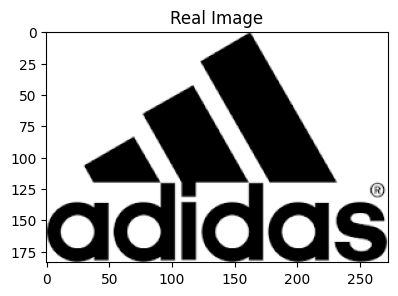

In [22]:
fig = plt.figure(figsize=(15, 15))
rows = 3
cols = 3
i = 1

for file_name in os.listdir(f'{data}/LOGO'):
    print(file_name)
    image = cv2.imread(f'{data}/LOGO/{file_name}')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(image)
    i += 1
plt.title('Real Image')
plt.show()

crop_image_2_1.jpg
crop_image_1_1.jpg
crop_image_3_1.jpg
crop_image_4_1.jpg
crop_image_4_2.jpg


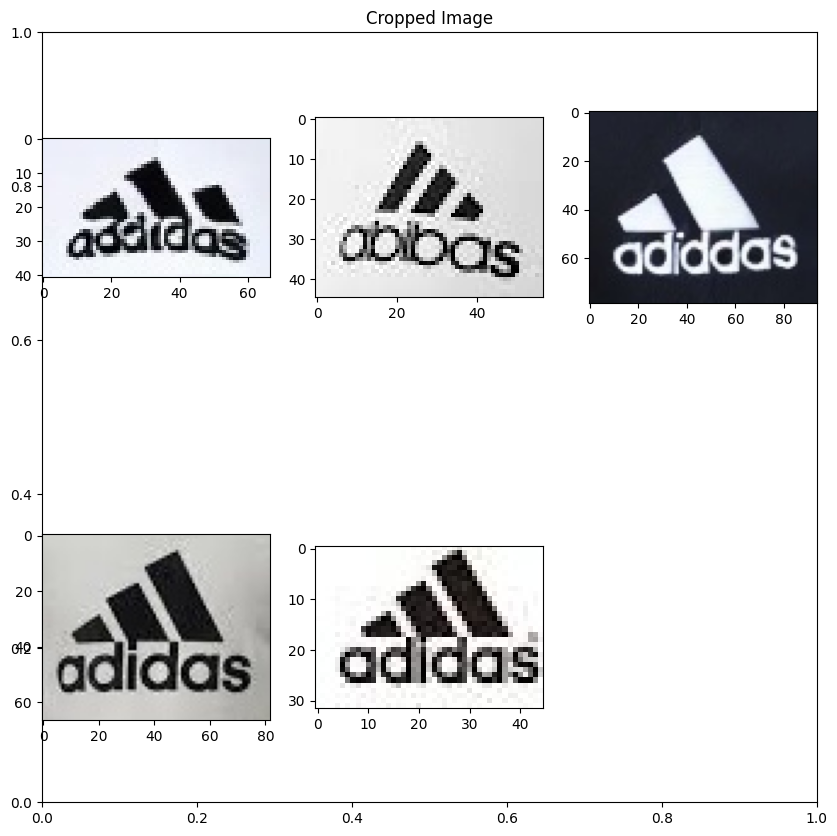

In [23]:
fig = plt.figure(figsize=(10, 10))
rows = 2
cols = 3
i = 1
plt.title('Cropped Image')

for file_name in os.listdir(f'{data}/cropped'):
    print(file_name)
    image = cv2.imread(f'{data}/cropped/{file_name}')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(image)
    i += 1
plt.show()

### Delete Cropped Data

In [13]:
# for file_path in os.listdir(f'/content/drive/MyDrive/ai부트캠프/Final_Project/Data/cropped'):
#     os.remove(f'/content/drive/MyDrive/ai부트캠프/Final_Project/Data/cropped/{file_path}')

# Upscaling

In [8]:
# Define model
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel('/content/drive/MyDrive/ai부트캠프/Final_Project/Similarity_Measure/EDSR_x3.pb')
sr.setModel('edsr', 3)

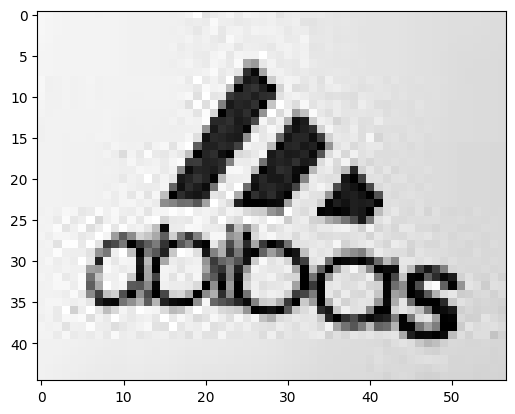

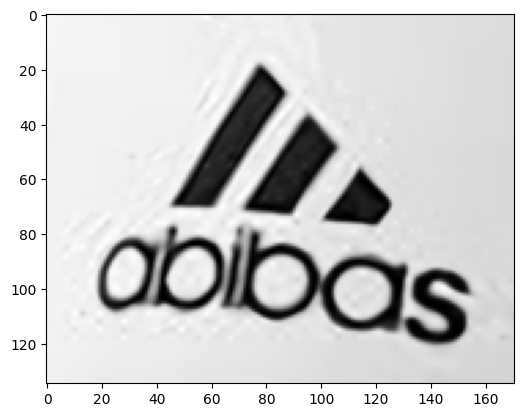

In [21]:
path = f'{data}/cropped/crop_image_1_1.jpg'

img = cv2.imread(path)
upscaled = sr.upsample(img)

plt.subplots(1)
plt.imshow(img)
plt.subplots(1)
plt.imshow(upscaled)
plt.show()

# Similarity


### ORB

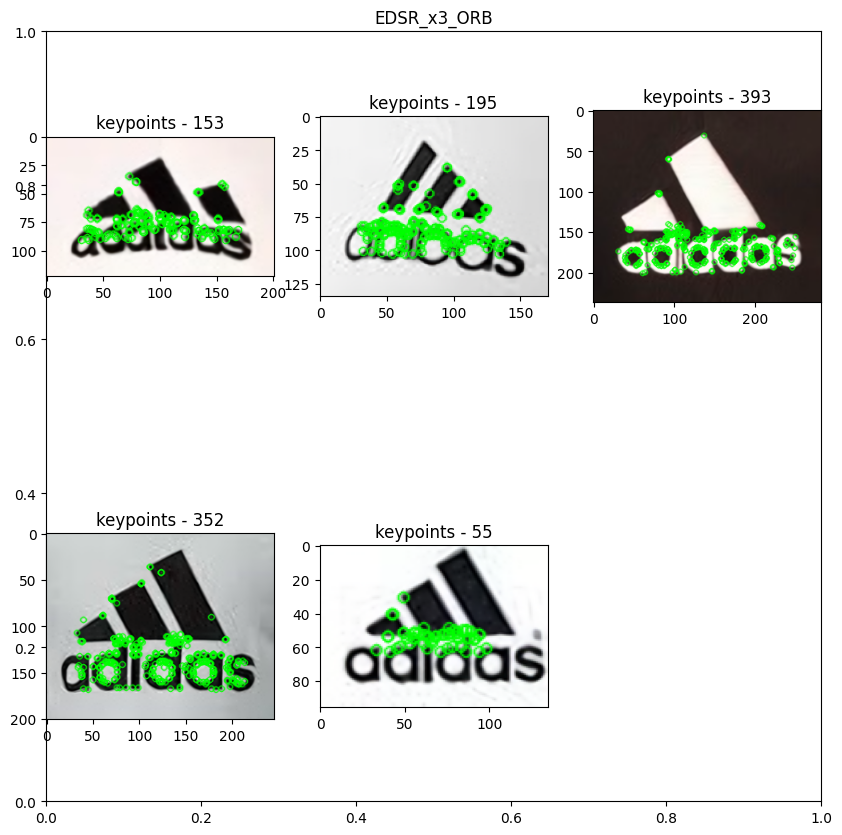

In [17]:
fig = plt.figure(figsize=(10, 10))
rows = 2
cols = 3
i = 1
plt.title('EDSR_x3_ORB')

for file_name in os.listdir(f'{data}/cropped'):
    path = f'{data}/cropped/{file_name}'
    img = cv2.imread(path)

    # upsampling
    img = sr.upsample(img)

    # Initiate ORB detector
    orb = cv2.ORB_create()

    # find the keypoints with ORB and compute the descriptors
    kp, des = orb.detectAndCompute(img,None)

    # draw only keypoints location,not size and orientation
    img = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)

    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img)
    plt.title(f'keypoints - {len(kp)}')
    i += 1
plt.show()

### AKAZE

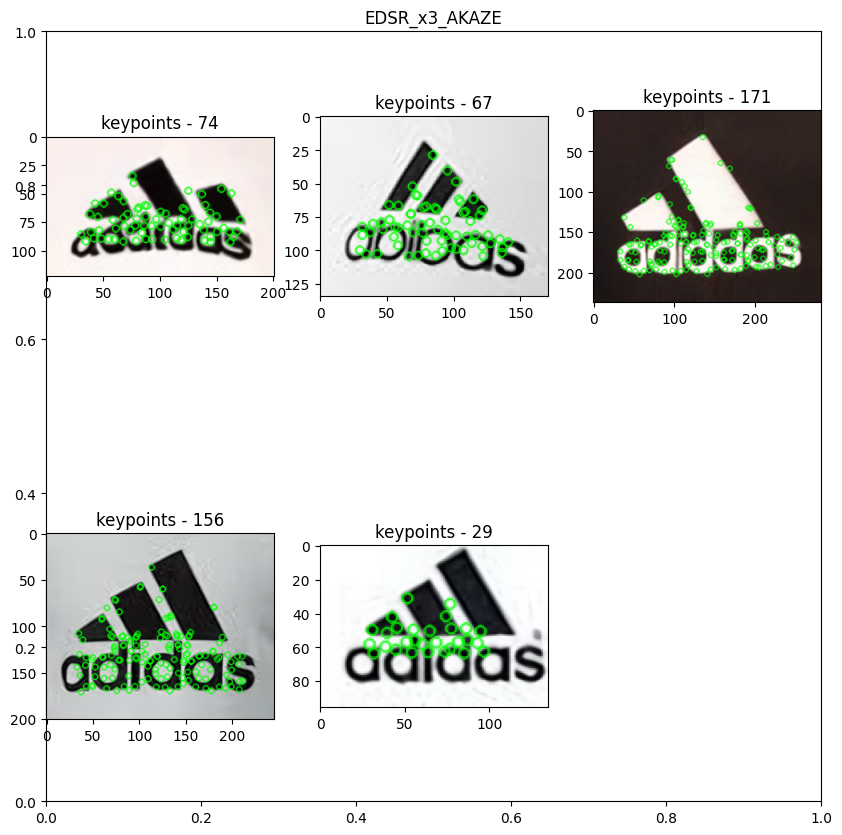

In [16]:
fig = plt.figure(figsize=(10, 10))
rows = 2
cols = 3
i = 1
plt.title('EDSR_x3_AKAZE')

for file_name in os.listdir(f'{data}/cropped'):
    path = f'{data}/cropped/{file_name}'
    img = cv2.imread(path)

    # upsampling
    img = sr.upsample(img)

    # Initiate ORB detector
    akaze = cv2.AKAZE_create()

    # compute the descriptors with ORB
    kp, des = akaze.detectAndCompute(img,None)

    # draw only keypoints location,not size and orientation
    img = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)

    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img)
    plt.title(f'keypoints - {len(kp)}')
    i += 1
plt.show()

### Compare Similarity

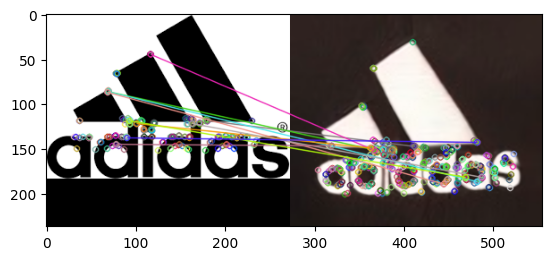

In [35]:
path1 = f'{data}/LOGO/adidas_sports_logo.png'
path2 = f'{data}/cropped/crop_image_3_1.jpg'
img1 = cv2.imread(path1)
img2 = cv2.imread(path2)
res = None

# upsampling cropped image
img2 = sr.upsample(img2)

# Initiate ORB detector
orb = cv2.ORB_create()

# compute the descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# Define Matcher
# ORB의 경우 2진 문자열 기반의 방식 -> HAMMING 사용되어져야 함
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# 가장 유사한 쌍 부터 n개의 쌍 연결
n = 10
res = cv2.drawMatches(img1,kp1,img2,kp2,matches[:n],res,flags=0)
plt.imshow(res)
plt.show()

In [40]:
cnt = 1
for match_ in matches:
    print(match_.distance)
    cnt += 1
    if cnt > 10:
        break

36.0
36.0
38.0
41.0
44.0
47.0
48.0
49.0
51.0
52.0
53.0
53.0
54.0
54.0
55.0
55.0
55.0
57.0
57.0
58.0
58.0
58.0
58.0
58.0
58.0
59.0
59.0
60.0
60.0
60.0
61.0
61.0
61.0
61.0
62.0
63.0
64.0
64.0
65.0
67.0
67.0
67.0
67.0
67.0
67.0
67.0
68.0
68.0
69.0
69.0
69.0
70.0
71.0
72.0
72.0
72.0
72.0
73.0
75.0
79.0
79.0


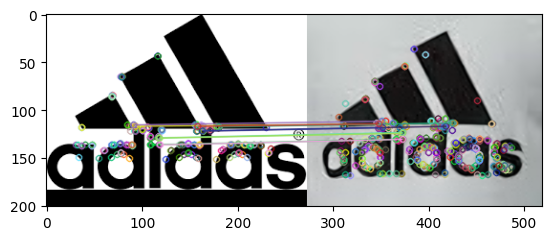

In [29]:
path1 = f'{data}/LOGO/adidas_sports_logo.png'
path2 = f'{data}/cropped/crop_image_4_1.jpg'
img1 = cv2.imread(path1)
img2 = cv2.imread(path2)
res = None

# upsampling cropped image
img2 = sr.upsample(img2)

# Initiate ORB detector
orb = cv2.ORB_create()

# compute the descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# Define Matcher
# ORB의 경우 2진 문자열 기반의 방식 -> HAMMING 사용되어져야 함
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# 가장 유사한 쌍 부터 n개의 쌍 연결
n = 10
res = cv2.drawMatches(img1,kp1,img2,kp2,matches[:n],res,flags=0)
plt.imshow(res)
plt.show()

In [30]:
cnt = 1
for match_ in matches:
    print(match_.distance)
    cnt += 1
    if cnt > 10:
        break

19.0
21.0
23.0
23.0
24.0
27.0
27.0
27.0
28.0
28.0
